# Part 1 

 - start with fitting data to a parametric model
 
 - so we need to create the log-likehood
 - let's create some fake data first.

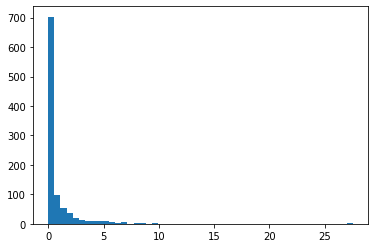

In [5]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt


T = (np.random.exponential(size=1000)/1.5) ** 2.3

plt.hist(T, bins=50);

Let's use the Weibull parametric model: https://en.wikipedia.org/wiki/Weibull_distribution

In [8]:
def pdf(params, t):
    lambda_, rho_ = params
    # I'm not going to make you type this out - it's annoying and error prone. 
    return rho_ / lambda_ * (t / lambda_) ** (rho_ - 1) * np.exp(-(t/lambda_) ** rho_)

# okay, but we actually need the _log_ of the pdf
def log_pdf(params, t):
    lambda_, rho_ = params
    # I'm not going to make you type this out - it's annoying and error prone. 
    return np.log(rho_) - np.log(lambda_) + (rho_ - 1) * (np.log(t) - np.log(lambda_)) - (t/lambda_) ** rho_

# now we can define the log likehood

def log_likelihood(params, t):
    return np.sum(log_pdf(params, t)) 


## `scipy.optimize.minimize`

In [10]:
from scipy.optimize import minimize

results = minimize(log_likelihood, 
        x0 = np.array([1.0, 1.0]),  # some initial guess of the parameters. 
        method=None, 
        args=(T, ))

print(results)

      fun: -943.2248593937613
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([  -56.77513885, -2569.54563904])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 137
      nit: 0
     njev: 32
   status: 2
  success: False
        x: array([1., 1.])


In [15]:
def log_likelihood(params, t):
    return -np.sum(log_pdf(params, t)) 


In [16]:
results = minimize(log_likelihood, 
        x0 = np.array([1.0, 1.0]),  # some initial guess of the parameters. 
        method=None, 
        args=(T, ))

print(results)

      fun: nan
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 448
      nit: 1
     njev: 112
   status: 2
  success: False
        x: array([  -21.84637036, -1032.98763095])


/Users/camerondavidson-pilon/venvs/data/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/camerondavidson-pilon/venvs/data/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.
/Users/camerondavidson-pilon/venvs/data/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in power
  # Remove the CWD from sys.path while we load stuff.
/Users/camerondavidson-pilon/venvs/data/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/camerondavidson-pilon/venvs/data/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in power
  # Remove the CWD from sys.path while we load stuff.
/Users/camerondavid

In [18]:
# weibull parameters must be greater than 0!
# we can "nudge" the minimizer to understand this using the bounds argument
results = minimize(log_likelihood, 
        x0 = np.array([1.0, 1.0]),
        method=None, 
        args=(T, ),
        bounds=((0, None), (0, None)))

print(results)

      fun: 59.79409380937696
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.68434189e-06, -8.52651283e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 33
      nit: 10
   status: 0
  success: True
        x: array([0.36117292, 0.43729557])


## Takeaway: `minimize` is a very flexible function for small-mid size parameter optimization

### A few problems though:

1. You are stuck with only using known parametric models that are easy to implement. 
2. Not very fast minimization routines

Let's move to Part 2. 